# Simulating your income 

In [110]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Question 1

In [111]:
def life_income_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'inc0'        : 80000,      #average initial income
        'gr'          : 0.03,       #long-run growth rate
        'sigma'       : 0.1,       #standard deviation
        'rho'         : 0.2,        #persistence
        'mean'        : 0,          #mean
        'st_year'     : int(2019),  #start year
        'work_years'  : 40,         #years to work
        'num_draws'   : 10000,      #simulations
    }
    """    

    #set random seed
    np.random.seed(524)

    normal_dist_errors = np.random.normal(p['mean'], p['sigma'], (p['work_years'], p['num_draws']))

    #create a matrix of dim (work_years, num_draws)
    ln_income_mat = np.zeros((p['work_years'], p['num_draws']))

    #fill the matrix
    ln_income_mat[0, :] = np.log(p['inc0']) + normal_dist_errors[0, :]

    #loop and apply model
    for yr in range(1, p['work_years']):
        ln_income_mat[yr, :] = (1 - p["rho"]) * (np.log(p["inc0"]) + p["gr"] * yr) + \
                               p["rho"] * ln_income_mat[yr - 1, : ] + normal_dist_errors[yr, : ]

    income_mat = np.exp(ln_income_mat) #dealing with large numbers so put in terms of 10k's
    return income_mat

Text(0,0.5,'Annual income (\\$s)')

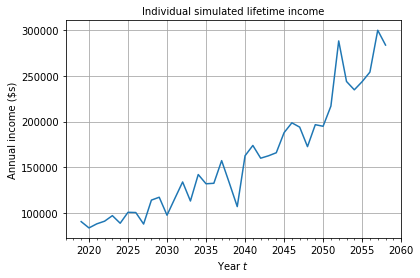

In [112]:
simulation_profile = {
    'inc0'        : 80000,
    'gr'          : 0.03,
    'sigma'       : 0.1,
    'rho'         : 0.2,
    'mean'        : 0,           
    'st_year'     : int(2019),
    'work_years'  : 40,      
    'num_draws'   : 10000
}


income_mat = life_income_sim(simulation_profile)

%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['work_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)') 

# Question 2

Text(0,0.5,'Frequency')

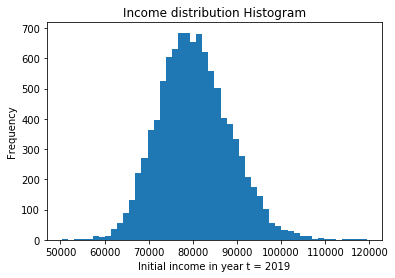

In [113]:
plt.hist(income_mat[0], bins = 50)
plt.title("Income distribution Histogram")
plt.xlabel("Initial income in year t = 2019")
plt.ylabel("Frequency")

In [114]:
num_over_100000 = len([x for x in income_mat[0] if x > 100000])
percent_over_100000 = num_over_100000/len(income_mat[0])
print("{:.2f}% of the students will earn more than $100000".format(percent_over_100000 * 100))

1.27% of the students will earn more than $100000


In [115]:
num_below_70000 = len([x for x in income_mat[0] if x < 70000])
percent_below_70000 = num_below_70000/len(income_mat[0])
print("{:.2f}% of the students will earn less than $70000".format(percent_below_70000 * 100))

9.02% of the students will earn less than $70000


The distrubution is slightly right-skewed, but overall the distrubution is approximately normal

# Question 3

In [116]:
year_mat = np.zeros(p['num_draws'])
debt = 95000
for num in range(p['num_draws']):
    need_to_pay = debt
    years_need = 0
    for yr in range(p['work_years']):
        need_to_pay -= 0.1 * income_mat[yr, num]
        years_need += 1
        if need_to_pay <= 0:
            year_mat[num] = years_need
            break

Text(0.5,1,'Histogram of years needed to pay off the loan')

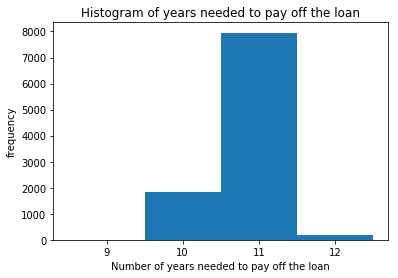

In [117]:
plt.hist(year_mat, bins = np.arange(min(year_mat) -  0.5, max(year_mat) + 1, 1))
plt.xticks(np.arange(np.min(year_mat), np.max(year_mat) + 1))
plt.xlabel('Number of years needed to pay off the loan')
plt.ylabel('frequency')
plt.title('Histogram of years needed to pay off the loan')

In [118]:
num_under_10_years = len([x for x in year_mat if x <= 10])
percent_under_10_years = num_under_10_years/len(income_mat[0])
print("{:.2f}% of the students will pay off the debt in 10 years".format(percent_under_10_years * 100))

18.47% of the students will pay off the debt in 10 years


# Question 4

In [119]:
new_simulation_profile = {
    'inc0'        : 85000,
    'gr'          : 0.03,
    'sigma'       : 0.15,
    'rho'         : 0.2,
    'mean'        : 0,           
    'st_year'     : int(2019),
    'work_years'  : 40,      
    'num_draws'   : 10000
}
new_income_mat = life_income_sim(new_simulation_profile)
year_mat = np.zeros(p['num_draws'])
debt = 95000
for num in range(p['num_draws']):
    need_to_pay = debt
    years_need = 0
    for yr in range(p['work_years']):
        need_to_pay -= 0.1 * new_income_mat[yr, num]
        years_need += 1
        if need_to_pay <= 0:
            year_mat[num] = years_need
            break

Text(0.5,1,'Histogram of years needed to pay off the loan')

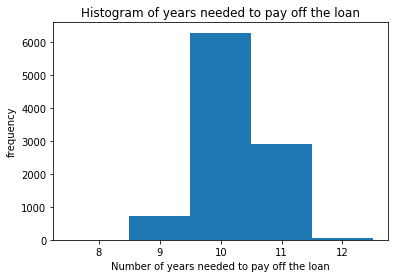

In [120]:
plt.hist(year_mat, bins = np.arange(min(year_mat) - 0.5, max(year_mat) + 1, 1))
plt.xticks(np.arange(np.min(year_mat), np.max(year_mat) + 1))
plt.xlabel('Number of years needed to pay off the loan')
plt.ylabel('frequency')
plt.title('Histogram of years needed to pay off the loan')

In [121]:
num_under_10_years = len([x for x in year_mat if x <= 10])
percent_under_10_years = num_under_10_years/len(new_income_mat[0])
print("{:.2f}% of the students will pay off the debt in 10 years".format(percent_under_10_years * 100))

70.20% of the students will pay off the debt in 10 years
